In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
train=pd.read_csv("C:/Users/shreya sureka/Downloads/loan-train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
test = pd.read_csv('C:/Users/shreya sureka/Downloads/loan-test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [15]:
#Making the copy of original dataset in train_original and test original 
train_original=train.copy()
test_original=test.copy()


## Exploratory data analysis and Visualizations

In [22]:
train.shape

(614, 13)

In [23]:
test.shape

(367, 12)

In [16]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [127]:
test.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'LoanAmount_log', 'Dependents'],
      dtype='object')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [30]:
#To know, How many values available in object('categorical') type of features And Return Categorical values with Count

def explore_object_type(df ,feature_name):
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [31]:
#value count for every dtype object feature
for featureName in train.columns:
    if train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(train, str(featureName))


"Loan_ID's" Values with count are :
LP001529    1
LP001241    1
LP001256    1
LP002004    1
LP001634    1
           ..
LP001974    1
LP001699    1
LP002068    1
LP002699    1
LP001702    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


In [32]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

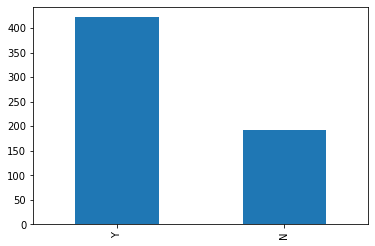

In [33]:
train['Loan_Status'].value_counts().plot.bar()

#### Visualizing Independent categorical variable 

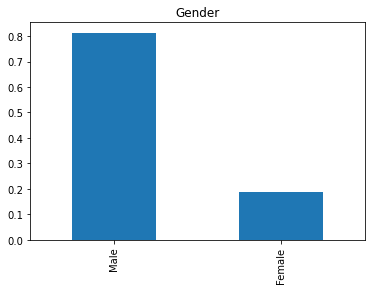

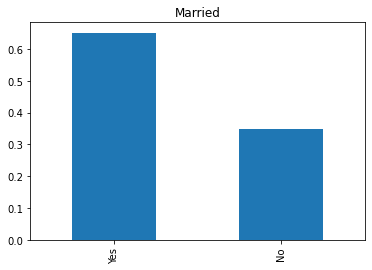

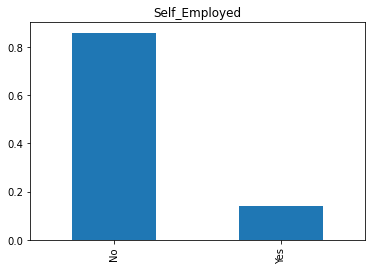

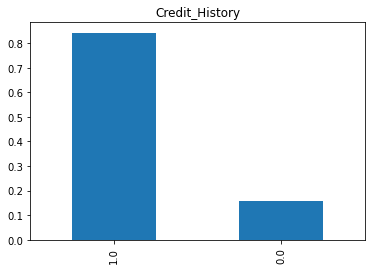

In [35]:
train['Gender'].value_counts(normalize=True).plot.bar( title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

#### Visualizing ordinal independent variables

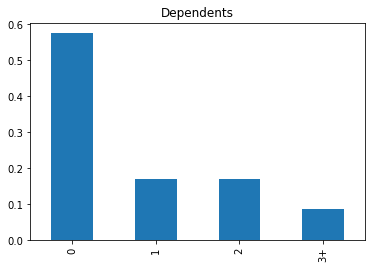

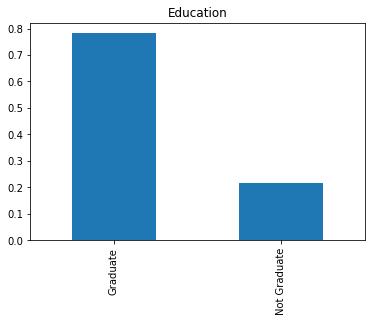

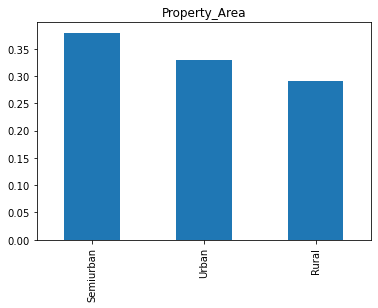

In [37]:
train['Dependents'].value_counts(normalize=True).plot.bar( title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

#### visualizing numerical independent variable

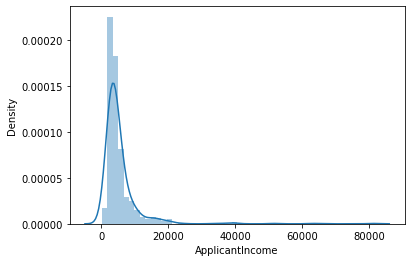

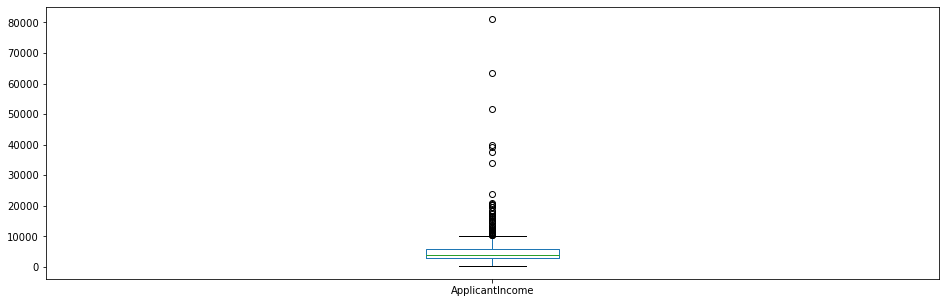

In [38]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

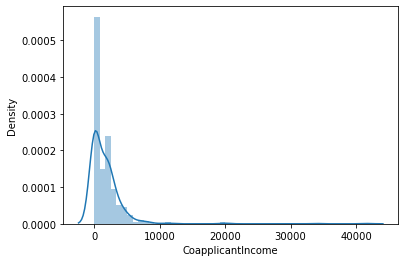

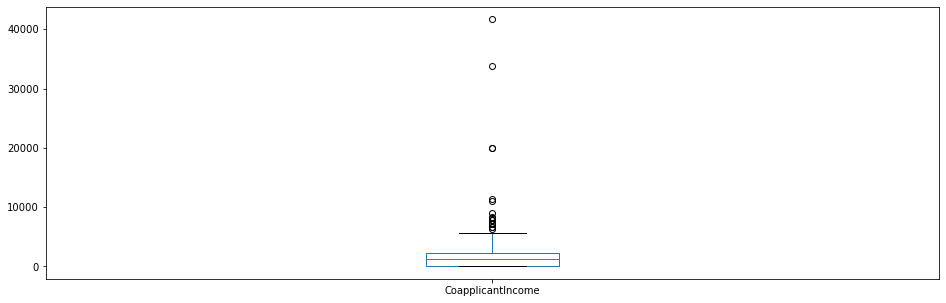

In [39]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

### Missing Values

In [90]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
#categorical
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)


In [92]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [94]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [128]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       5
Dependents           0
dtype: int64

In [129]:
#categorical
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['LoanAmount_log'].fillna(test['Self_Employed'].mode()[0], inplace=True)

In [130]:
test.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
Dependents           0
dtype: int64

### Bivariate Analysis

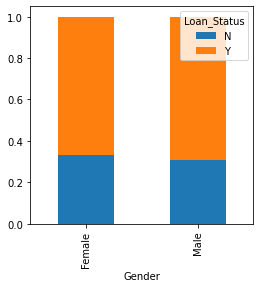

In [48]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

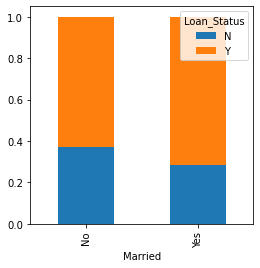

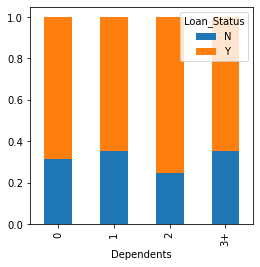

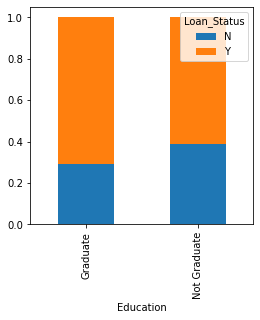

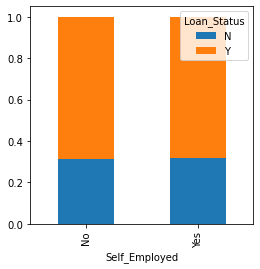

In [55]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

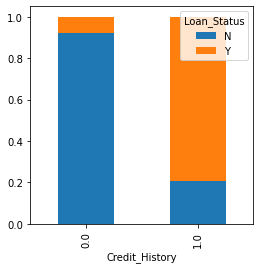

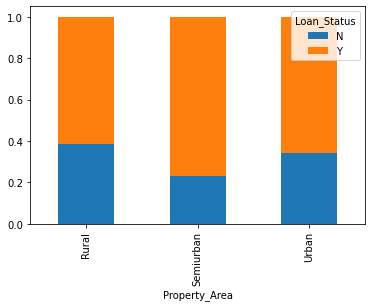

In [54]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

Text(0.5, 0.98, '')

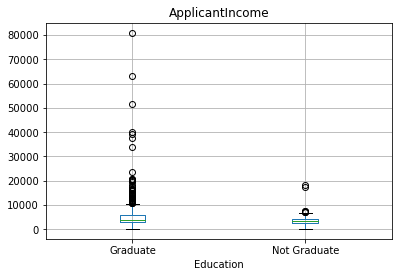

In [56]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

<AxesSubplot:xlabel='Loan_Status'>

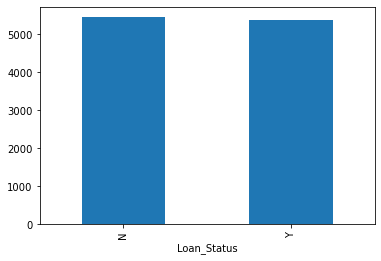

In [57]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

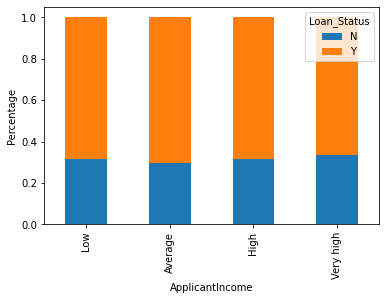

In [58]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

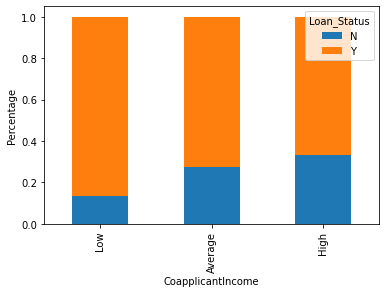

In [59]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

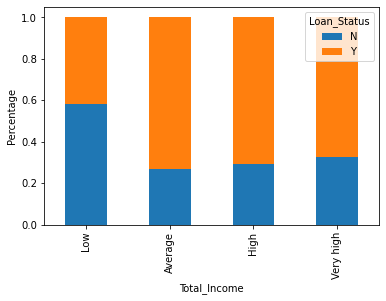

In [60]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

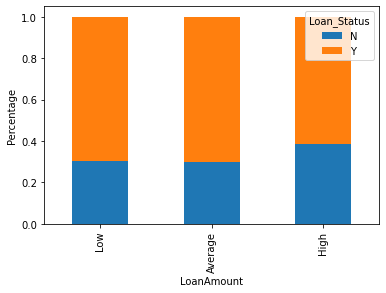

In [61]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

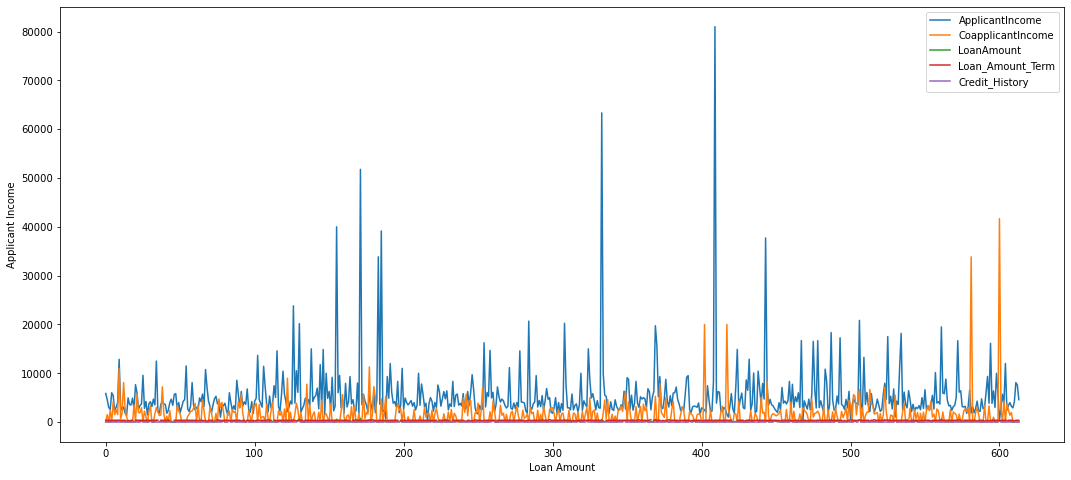

In [5]:
train.plot(figsize=(18, 8))
plt.xlabel("Loan Amount")
plt.ylabel("Applicant Income")
plt.show()

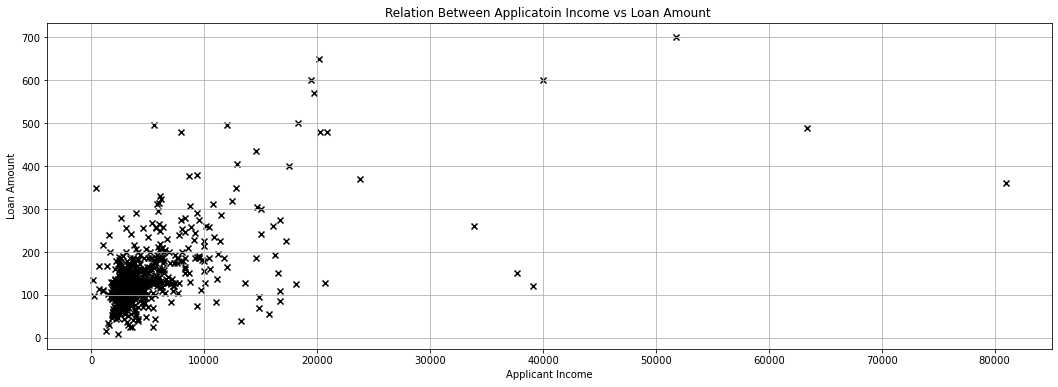

In [64]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Loan Amount ")

plt.grid()
plt.scatter(train['ApplicantIncome'] , train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

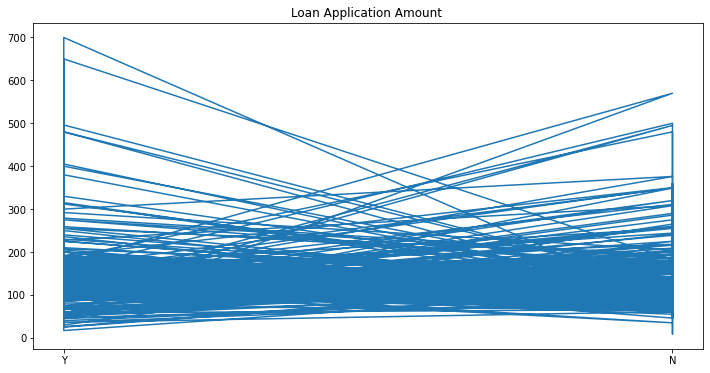

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(train['Loan_Status'], train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

### Outliers 

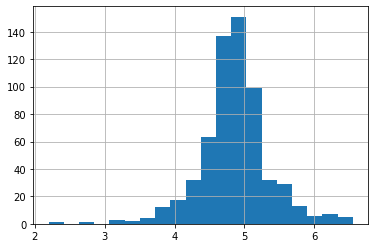

In [95]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

### Encoding 

In [96]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

train = train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test = test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)


In [97]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [98]:
Dependents_ = pd.to_numeric(train.Dependents)
Dependents__ = pd.to_numeric(test.Dependents)
train.drop(['Dependents'], axis = 1, inplace = True)
test.drop(['Dependents'], axis = 1, inplace = True)
train = pd.concat([train, Dependents_], axis = 1)
test = pd.concat([test, Dependents__], axis = 1)

<AxesSubplot:>

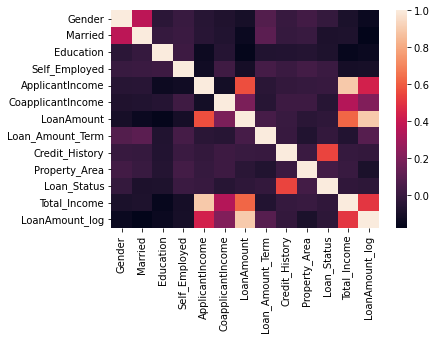

In [70]:
sns.heatmap(train.corr())

In [7]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


### Separating Target from the feature for training

In [99]:
y = train['Loan_Status']
X = train.drop('Loan_Status', axis = 1)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#### Logistic Regression

In [107]:
model = LogisticRegression(solver='liblinear')


In [108]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [110]:
pred = model.predict(X_test)
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [117]:
print('Coefficient of model :', model.coef_)

Coefficient of model : [[ 6.95571160e-02 -3.85514603e-01 -4.82502333e-01 -8.75961185e-02
   9.94356164e-06 -5.36408903e-05 -1.11179794e-03 -3.83943904e-04
   2.92906171e+00  1.29897989e-01 -1.15761303e-01  1.09627616e-01]]


In [118]:
print('Intercept of model',model.intercept_)

Intercept of model [0.00193442]


In [111]:
evaluation = f1_score(y_test, pred)
evaluation

0.8979591836734695

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8373983739837398

In [131]:
pred_test = model.predict(test)

In [132]:
loandata_test = pd.DataFrame(test, columns = ['Loan_ID', 'Loan_Status'])

In [134]:
loandata_test['Loan_Status']=pred_test
loandata_test['Loan_ID']=test_original['Loan_ID']

In [137]:
loandata_test['Loan_Status'].replace(0, 'N', inplace=True)
loandata_test['Loan_Status'].replace(1, 'Y', inplace=True)

In [138]:
loandata_test.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [152]:
loandata_test.Loan_Status.value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

####  Feature Engineering 

In [156]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

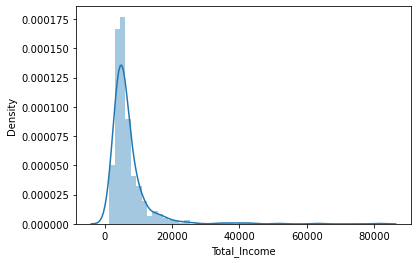

In [157]:
sns.distplot(train['Total_Income'])

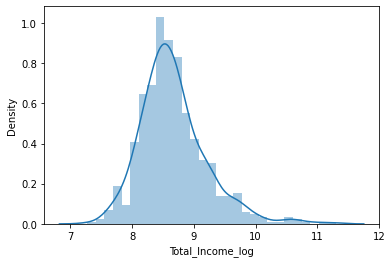

In [158]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [154]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

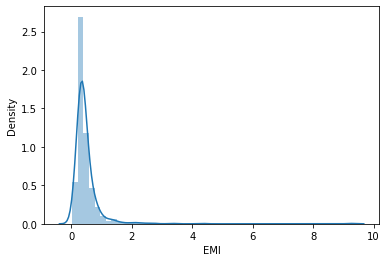

In [159]:
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

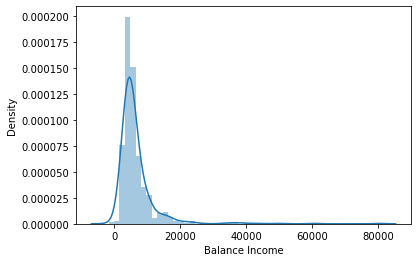

In [160]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [161]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [176]:
train.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History',
       'Property_Area', 'Loan_Status', 'LoanAmount_log', 'Dependents',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

### Model 2 

In [162]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [164]:
model = LogisticRegression(solver='liblinear')

In [165]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [166]:
pred = model.predict(X_test)
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [167]:
evaluation = f1_score(y_test, pred)
evaluation

0.8934010152284264

In [168]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8292682926829268

In [169]:
pred_test1 = model.predict(test)

In [170]:
loandata_test1 = pd.DataFrame(test, columns = ['Loan_ID', 'Loan_Status'])

In [171]:
loandata_test1['Loan_Status']=pred_test1
loandata_test1['Loan_ID']=test_original['Loan_ID']

In [172]:
loandata_test1['Loan_Status'].replace(0, 'N', inplace=True)
loandata_test1['Loan_Status'].replace(1, 'Y', inplace=True)

In [173]:
loandata_test1.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [174]:
loandata_test1.Loan_Status.value_counts()

Y    307
N     60
Name: Loan_Status, dtype: int64

In [198]:
pd.DataFrame(loandata_test1, columns=['Loan_ID','Loan_Status']).to_csv('C:/Users/shreya sureka/Downloads/output.csv')

### Decision Tree

In [178]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train) 

DecisionTreeClassifier()

In [179]:
prediction = tree.predict(X_test)
print(prediction)

[0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1
 1 0 1 0 0 1 1 1 0 1 0 1]


In [180]:
evaluation1 = f1_score(y_test, prediction)
evaluation1

0.7810650887573963

In [181]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.6991869918699187

In [182]:
pred_test2 = tree.predict(test)

In [183]:
loandata_test2 = pd.DataFrame(test, columns = ['Loan_ID', 'Loan_Status'])
loandata_test2['Loan_Status']=pred_test2
loandata_test2['Loan_ID']=test_original['Loan_ID']
loandata_test2['Loan_Status'].replace(0, 'N', inplace=True)
loandata_test2['Loan_Status'].replace(1, 'Y', inplace=True)
loandata_test2.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [184]:
loandata_test2.Loan_Status.value_counts()

Y    233
N    134
Name: Loan_Status, dtype: int64

### Random forest

In [185]:
random=RandomForestClassifier()
random.fit(X_train,y_train)

RandomForestClassifier()

In [186]:
prediction1 = random.predict(X_test)
print(prediction1)

[1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 1 0 1]


In [187]:
evaluation2 = f1_score(y_test, prediction1)
evaluation2

0.8478260869565217

In [189]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.7723577235772358

In [193]:
pred_test3 = random.predict(test)

In [194]:
loandata_test3 = pd.DataFrame(test, columns = ['Loan_ID', 'Loan_Status'])
loandata_test3['Loan_Status']=pred_test3
loandata_test3['Loan_ID']=test_original['Loan_ID']
loandata_test3['Loan_Status'].replace(0, 'N', inplace=True)
loandata_test3['Loan_Status'].replace(1, 'Y', inplace=True)
loandata_test3.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [195]:
loandata_test3.Loan_Status.value_counts()

Y    287
N     80
Name: Loan_Status, dtype: int64